In [1]:
from SunImports import *
%load_ext autoreload
%autoreload 2

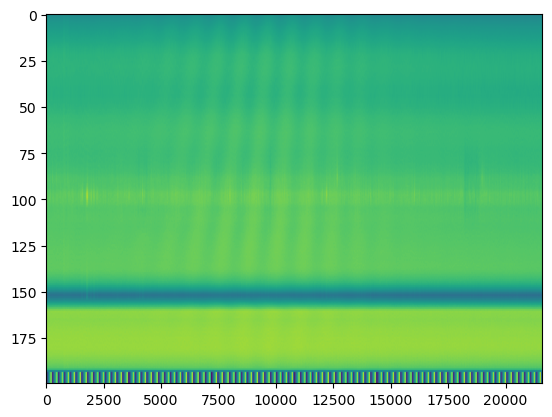

In [2]:
files = ['Zweite Daten Sonne 10/ETH_20240110_111502_01.fit', 
         'Zweite Daten Sonne 10/ETH_20240110_113002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_114502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_120002_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_121502_01.fit',
         'Zweite Daten Sonne 10/ETH_20240110_123003_01.fit']
data, t, freq = glue_together(files)
plt.imshow(data, aspect='auto')

Optimal Parameters of Normaldistribution
----------------------------------------
tmax  = 2.43e+03 ± 10.2 s
sigma = 0.0751 ± 0.00108

chisq in fit of 0th f: r = 3.11e+05


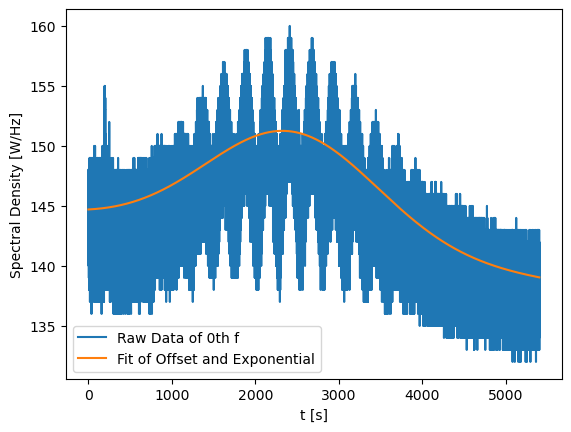

chisq in fit of 1th f: r = 3.2e+05
chisq in fit of 2th f: r = 3.27e+05
chisq in fit of 3th f: r = 3.36e+05
chisq in fit of 4th f: r = 3.3e+05
chisq in fit of 5th f: r = 3.35e+05
chisq in fit of 6th f: r = 3.28e+05
chisq in fit of 7th f: r = 3.31e+05
chisq in fit of 8th f: r = 3.29e+05
chisq in fit of 9th f: r = 3.29e+05
chisq in fit of 10th f: r = 3.22e+05


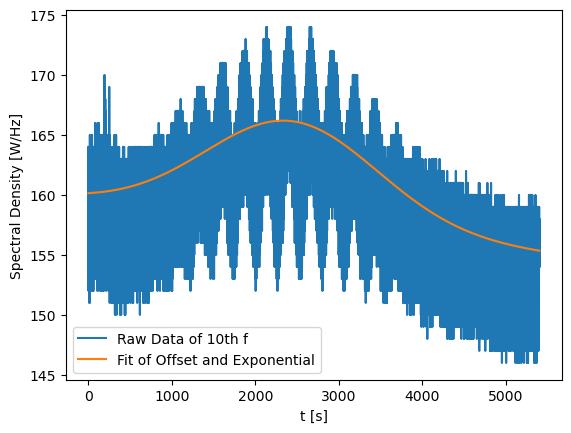

chisq in fit of 11th f: r = 3.29e+05
chisq in fit of 12th f: r = 3.26e+05
chisq in fit of 13th f: r = 3.26e+05
chisq in fit of 14th f: r = 3.28e+05
chisq in fit of 15th f: r = 3.32e+05
chisq in fit of 16th f: r = 3.33e+05
chisq in fit of 17th f: r = 3.28e+05
chisq in fit of 18th f: r = 3.23e+05
chisq in fit of 19th f: r = 3.23e+05
chisq in fit of 20th f: r = 3.26e+05


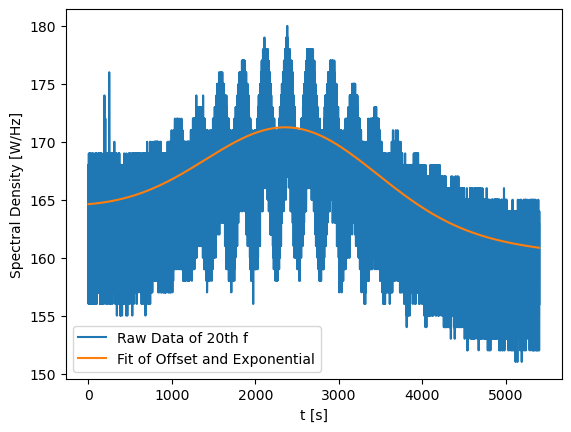

chisq in fit of 21th f: r = 3.24e+05
chisq in fit of 22th f: r = 3.29e+05
chisq in fit of 23th f: r = 3.26e+05
chisq in fit of 24th f: r = 3.24e+05
chisq in fit of 25th f: r = 3.26e+05
chisq in fit of 26th f: r = 3.19e+05
chisq in fit of 27th f: r = 3.24e+05
chisq in fit of 28th f: r = 3.25e+05
chisq in fit of 29th f: r = 3.29e+05
chisq in fit of 30th f: r = 3.31e+05


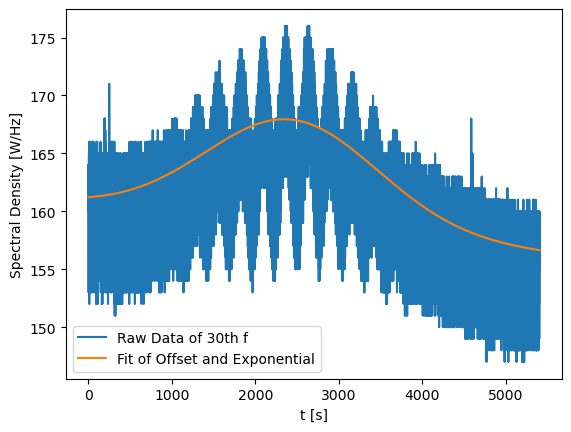

chisq in fit of 31th f: r = 3.29e+05
chisq in fit of 32th f: r = 3.29e+05
chisq in fit of 33th f: r = 3.33e+05
chisq in fit of 34th f: r = 3.32e+05
chisq in fit of 35th f: r = 3.29e+05
chisq in fit of 36th f: r = 3.29e+05
chisq in fit of 37th f: r = 3.3e+05
chisq in fit of 38th f: r = 3.27e+05
chisq in fit of 39th f: r = 3.37e+05
chisq in fit of 40th f: r = 3.36e+05


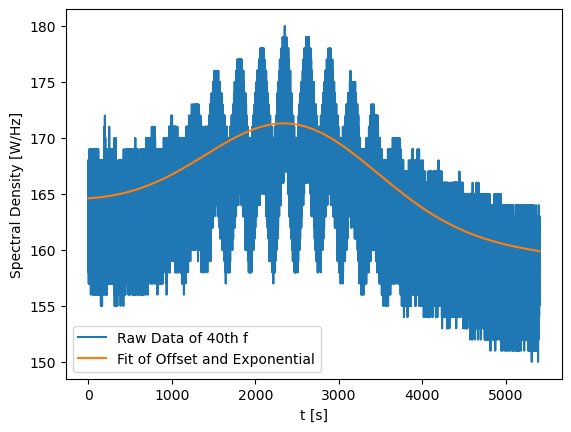

chisq in fit of 41th f: r = 3.33e+05
chisq in fit of 42th f: r = 3.29e+05
chisq in fit of 43th f: r = 3.38e+05
chisq in fit of 44th f: r = 3.36e+05
chisq in fit of 45th f: r = 3.31e+05
chisq in fit of 46th f: r = 3.31e+05
chisq in fit of 47th f: r = 3.29e+05
chisq in fit of 48th f: r = 3.35e+05
chisq in fit of 49th f: r = 3.27e+05


In [52]:
# p0 = (S0, tmax, sigma, a, b)
p0 = (100, 2500, 0.065, 0.1, 145.0)
data_filtered, params_tot, cov_tot, tmax_opt, sigma_opt = data_filter(data, t, (10, 60), p0)

chisq in fit of 0th f: r = 2.44e+03


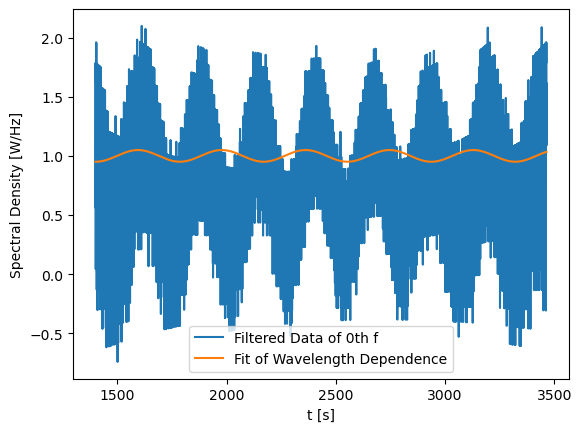

chisq in fit of 1th f: r = 2.51e+03
chisq in fit of 2th f: r = 2.47e+03
chisq in fit of 3th f: r = 2.61e+03
chisq in fit of 4th f: r = 2.52e+03
chisq in fit of 5th f: r = 2.56e+03
chisq in fit of 6th f: r = 2.54e+03
chisq in fit of 7th f: r = 2.74e+03
chisq in fit of 8th f: r = 2.94e+03
chisq in fit of 9th f: r = 3.07e+03
chisq in fit of 10th f: r = 2.93e+03


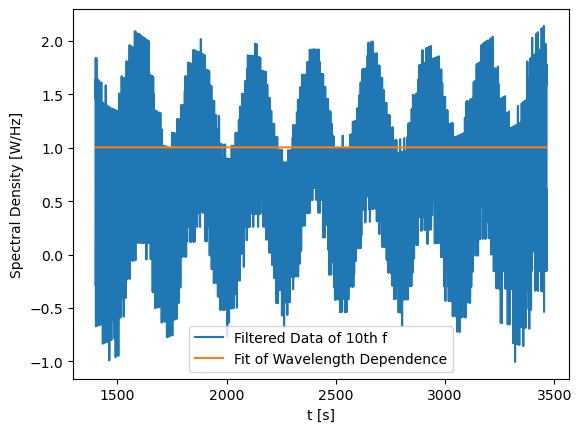

chisq in fit of 11th f: r = 2.89e+03
chisq in fit of 12th f: r = 2.71e+03
chisq in fit of 13th f: r = 2.8e+03
chisq in fit of 14th f: r = 2.81e+03
chisq in fit of 15th f: r = 2.91e+03
chisq in fit of 16th f: r = 2.9e+03
chisq in fit of 17th f: r = 2.98e+03
chisq in fit of 18th f: r = 2.86e+03
chisq in fit of 19th f: r = 2.79e+03
chisq in fit of 20th f: r = 2.91e+03


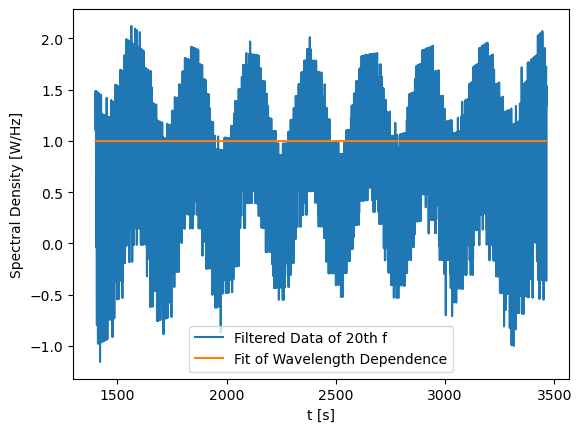

chisq in fit of 21th f: r = 2.82e+03
chisq in fit of 22th f: r = 2.84e+03
chisq in fit of 23th f: r = 2.9e+03
chisq in fit of 24th f: r = 2.86e+03
chisq in fit of 25th f: r = 2.91e+03
chisq in fit of 26th f: r = 2.72e+03
chisq in fit of 27th f: r = 2.75e+03
chisq in fit of 28th f: r = 2.74e+03
chisq in fit of 29th f: r = 2.8e+03
chisq in fit of 30th f: r = 2.69e+03


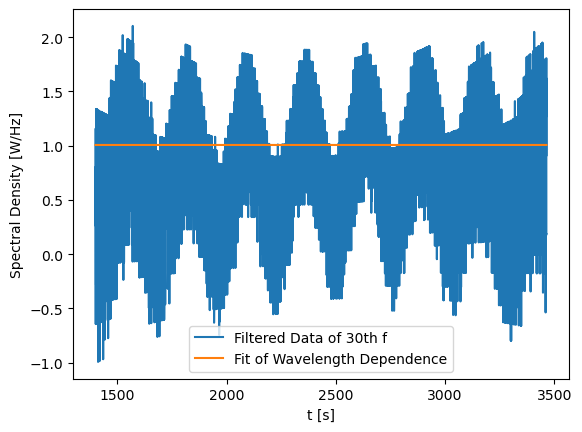

chisq in fit of 31th f: r = 2.56e+03
chisq in fit of 32th f: r = 2.61e+03
chisq in fit of 33th f: r = 2.7e+03
chisq in fit of 34th f: r = 2.6e+03
chisq in fit of 35th f: r = 2.61e+03
chisq in fit of 36th f: r = 2.55e+03
chisq in fit of 37th f: r = 2.65e+03
chisq in fit of 38th f: r = 2.58e+03
chisq in fit of 39th f: r = 2.73e+03
chisq in fit of 40th f: r = 2.7e+03


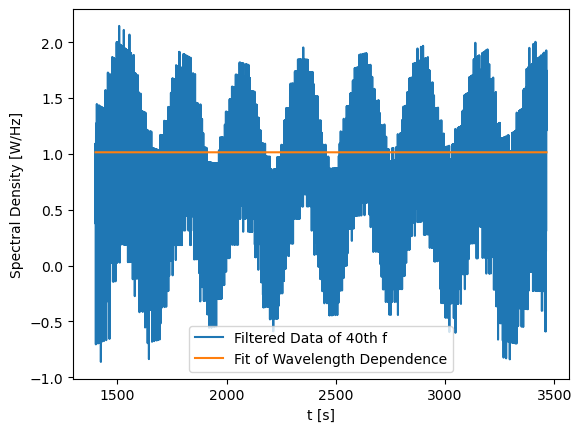

chisq in fit of 41th f: r = 2.74e+03
chisq in fit of 42th f: r = 2.61e+03
chisq in fit of 43th f: r = 2.73e+03
chisq in fit of 44th f: r = 2.7e+03
chisq in fit of 45th f: r = 2.94e+03
chisq in fit of 46th f: r = 2.84e+03
chisq in fit of 47th f: r = 3.1e+03
chisq in fit of 48th f: r = 3.09e+03
chisq in fit of 49th f: r = 3.14e+03


In [51]:
# p0 = (V0, Beff, phi)
p0 = (1.0, 5, 0.0)
V0, BeffoverL = data_fitter(data_filtered, t, freq, (10, 60), tmax_opt, sigma_opt, p0)